1. [Athena](#athena)
2. [Athena Examples](#athena-examples)
3. [Athena + Glue](#athena--glue)
4. [Athena Work groups](#athena-work-groups)
5. [Athena Cost Model](#athena-cost-model)
6. [Athena Security](#athena-security)
7. [Athena Anti patterns](#athena-anti-patterns)
8. [Athena - Optimizing Performance](#athena---optimizing-performance)
9. [Athena ACID transactions](#athena-acid-transactions)
10. [Athena Fine Grained Access to AWS Glue Data Catalog](#athena-fine-grained-access-to-aws-glue-data-catalog)
11. [Hands On - Athena + Glue + S3 data lake](#hands-on---athena--glue--s3-data-lake)
12. [Athena - CREATE TABLE AS SELECT (CTAS)](#athena---create-table-as-select-ctas)
13. [Athena Federated Queries](#athena-federated-queries)

#### Athena:
- Interactive query service for S3 (SQL)
    - no need to load data if it is in S3
- It uses Presto SQL Query Engine and Database
    - now it also supports Spark SQL Engine, Trino SQL Engine 
- serverless
- supports many data formats
    - JSON
    - XML
    - CSV
    - ORC (columnar, splittable)
    - Parquet (columnar, splittable)
    - Avro (splittable)
    - Snappy, Zlib, LZO, Gzip compressions
- data can be structured, semi-structured or unstructured

Note:
- Columnar storage format is a way to organize data in columns instead of rows

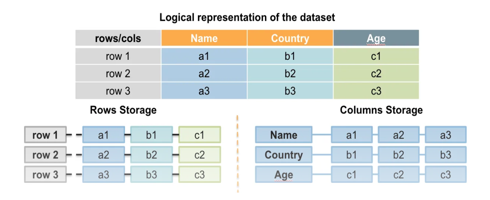

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/columnar.jpeg')
new_image = img.resize((490, 200))
display(new_image)

#### Athena Examples:
- Ad-hoc queries of web logs
- Querying staging data before loading to Redshift
- Analyze CloudTrail, CloudFront, VPC, ELB, etc logs in S3
- Integration:
    - Jupyter, Zeppelin, RStudio Books
    - QuickSight
    - ODBC/JDBC with other visualization tools

#### Athena + Glue:
- Athena will automatically detect the data created within the Glue Data Catalog
- Athena will also build a table from it automatically
- Since AWS Glue crawler creates table definitions and schema for Glue Data Catalog, the data can be accessed by Athena but also used by other external tools like RDS, Redshift, Redshift Spectrum, EMR, etc or even any tool that works with Apache Hive MetaStore (Glue Data Catalog can act as a Hive MetaStore)
- Glue Data Catalog + Athena creates a unified metadata repository across various services, crawl data to discover schemas, populate catalog with new and modifiable table, partition definitions, maintain schema versioning

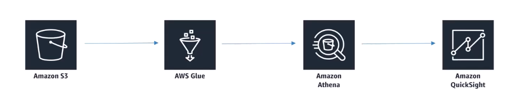

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/athena_glue.jpeg')
new_image = img.resize((510, 100))
display(new_image)

#### Athena Work groups:
- organize users, teams, apps, workload into work groups
- control query access and track cost 
- Integrates with CloudWatch, SNS, IAM
- Each Work group can have,
    - Query history
    - Data limits
    - IAM policies
    - Encryption settings

#### Athena Cost Model:
- Pay-as-you-go:
    - No charge for (CREATE/DROP/ALTER)
- Save alot of money using columnar format
- Glue and S3 have their own charges

#### Athena Security:
- Access control via IAM, ACLs, S3 bucket policies
    - IAM athena relevant policies: AmazonAthenaFullAccess/AWSQuickSightAthenaAccess
- Cross Account access via bucket policy
- Encryption:
    - At rest: server-side encryption (s3 managed keys), server-side encryption (KMS), client-side encryption (KMS)
    - In transit: TLS (Transport Layer Security)

#### Athena Anti patterns:
- Highly formatted reports/visualizations
    - We can use QuickSight for that instead of Athena
- ETL
    - Use Glue Instead

#### Athena - Optimizing Performance:
- Use columnar data for Athena
- small number of larger files performs better than large number of smaller filer
- use partitions,
    - use MSCK REPAIR TABLE command if we are applying partition after the table in Athena is already created

#### Athena ACID transactions:
- it is powered by Iceberg tables
    - 1st way to get ACID transactions via just add "table_type=ICEBERG" in the "CREATE TABLE" command
    - Another way, Similar to Lake Formation with governed tables to get ACID transactions, here we setup governed tables in Lake Formation and connect its target with Athena
- concurrent users can safely make row-level changes
- Compatible with EMR, Apache Spark or anything that support Iceberg table format
- removes the need for custom record locking
- time travel operation
    - recover recently deleted data
- Similar to Lake Formation with governed tables, we can perform periodic automatic compaction for storage optimization
    - A sample command as shown below
 

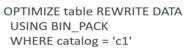

In [25]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ACID.jpeg')
new_image = img.resize((190, 50))
display(new_image)

#### Athena Fine Grained Access to AWS Glue Data Catalog:
- IAM-based database and table level security
    - broader than data filters in Lake formation
    - cannot restrict to specific table versions
- minimum we need IAM policy to grant access database and glue data catalog in each region

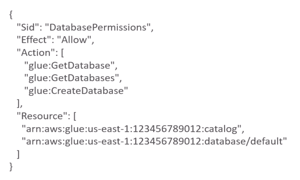

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/athenapolicy.jpeg')
new_image = img.resize((300, 180))
display(new_image)

- we can setup IAM policies to even restrict certain operation as shown below
    - ALTER or CREATE DATABASE
    - CREATE TABLE
    - DROP DATABASE OR TABLE
    - MSCK REPAIR TABLE
    - SHOW DATABASE OR TABLE
- we need to map related operation to the IAM actions
    - DROP TABLE
        - we need Partition & Table access first to perform DROP table

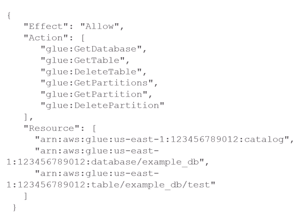

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/athenapolicy1.jpeg')
new_image = img.resize((300, 220))
display(new_image)

#### Hands On - Athena + Glue + S3 data lake:

Data Lake:
- Go to the S3 console
    - Go into the existing S3 bucket which serves as a data lake and verify the partition and files present inside
        - eg: JSON files

Glue:
- Go to Glue console
    - Go to Data Catalog option
        - Go to Database option
            - Add database
                - Name
        - Go to Table option and add a table using a crawler or Go to Crawler option and create a crawler and then add table to it
            - Crawler Name
            - Data Source
                - Data Source configuration
                - Add Data source
                    - S3
                    - S3 bucket path
                    - crawl run type
            - IAM Role
            - Target database
            - Maximum table threshold (optional - used when we generate more tables and partition issues)
            - Advanced options
                - Create a single schema for each S3 path
                - Table level (eg: dataset/a/b and if we set value to 3 then the table is created at dataset/a/b)
                - Schema change detected from data source (s3)
                - Handle deleted objects in the data store
            - Crawler schedule
                - On-demand
                - Schedule
                - during an event
            - Create Crawler
    - Go to Crawler options
        - Run the created crawler

Now go check the table created:
- Go to Data Catalog
    - Go to Tables option under Database option
        - We can see the table created
            - Click the Table name to see the table definition and schema created by crawler
                - Schema
                - Partition
                - Indexes
            - Click the View data option to to see the table data in Athena

Note:
- When we use Athena Query Editor for the first time, we should set the target (S3) to store the query output

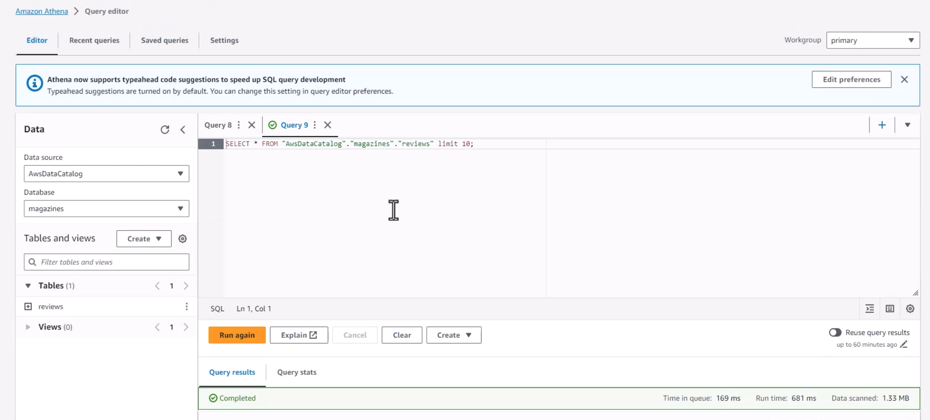

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/athenaeditor.jpeg')
new_image = img.resize((930, 420))
display(new_image)

#### Athena - CREATE TABLE AS SELECT (CTAS):
- Create a new table from the query results
- Left side query:
    - used to convert the data format 
- Right side query:
    - used to create subset table and convert data format and store it in external S3 with partitions as well

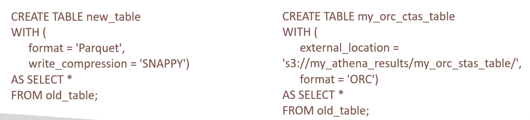

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ctas.jpeg')
new_image = img.resize((530, 120))
display(new_image)

#### Athena Federated Queries:
- queries data not only from S3 but also other sources
- Athena connects to other data sources via data source connector which runs in Lambda
- Data Sources:
    - CloudWatch
    - DynamoDB
    - DocumentDB
    - RDS
    - OpenSearch
    - JDBC
    - Custom connector
    - Third party ones
        - Kafka, Oracle, HBase, Cloudera, Snowflake, Teradata, etc
- Athena also supports VIEWS on federated queries which is stored in AWS Glue
- For security of external data sources credentials use AWS Secrets Manager
    - we need to configure VPC private endpoint for Athena to use it
- Some connectors can be setup via AWS Glue for fine grained access control via Lake Formation
    - Redshift, BigQuery, DynamoDB, SnowFlake, MySQL, etc
- Allow cross account federated queries with appropriate permissions
- PassThroughQueries: allows us to natively use query language of the data source
- Some connectors may be used as Spark data sources as well

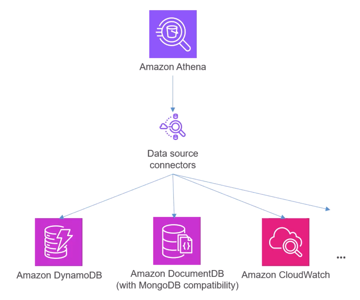

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/federated.jpeg')
new_image = img.resize((360, 300))
display(new_image)

- Eg: Query in cloudwatch via data connector shown in the below image

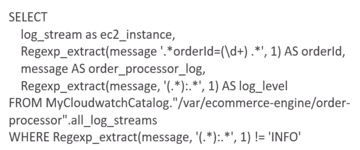

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/federated_query.jpeg')
new_image = img.resize((360, 150))
display(new_image)